An attempt to test the functions of the pandas library.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy  as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

import matplotlib.pyplot as plt
import re
import sklearn
import math

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from pandas import DataFrame , read_csv

import seaborn as sns

%pylab inline

%matplotlib inline

#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))


for f in os.listdir('../input'):
    print (f.ljust(30)+ str(round(os.path.getsize('../input/' + f), 2)) + ' Byte')

# Any results you write to the current directory are saved as output.

Populating the interactive namespace from numpy and matplotlib
th.csv                        138305 Byte


In [2]:
# Getting Data from CSV files
#Reading the csv file into a dataframe
df = pd.read_csv('../input/th.csv')
df.head(100)

,arveres_id,tetel_tulajdoni_hanyad
0,308084,1/6
1,308085,1/1
2,308087,2/2
3,308625,1/2+1/2 (összesen: 2
4,309448,1/1
5,309596,1/1
6,309658,1/1
7,309707,1/1
8,309793,1/1
9,310725,1/1


In [3]:
# a 11. sortól értékes df
df.info()

print(40*'_')

df[11:].info()
# Few of the Points from the summary include 
#  1. The dataframe has 2 columns 
#  2. The 0-10 rows replay from 11-th row 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10044 entries, 0 to 10043
Data columns (total 2 columns):
arveres_id                10044 non-null object
tetel_tulajdoni_hanyad    10044 non-null object
dtypes: object(2)
memory usage: 157.0+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10033 entries, 11 to 10043
Data columns (total 2 columns):
arveres_id                10033 non-null object
tetel_tulajdoni_hanyad    10033 non-null object
dtypes: object(2)
memory usage: 156.8+ KB


# "Hátulról darabolós" kiértékelés
A "tetel_tulajdoni_hanyad" stringjeit hátulról egyenként rövidítve addig daraboljuk, amíg 
az eval() int, vagy float értéket ad vissza. Addigra már levágtuk a betűket, a ()/-+... jeleket, mert általában az eleje 
használható. De a végéről közelítünk.

Ha így nem sikerül, akkor még megnézzük, hogy szerepel-e benne 1/1. Valahogy meg kellene különböztetni,hogy 1/1 # 1/100, ...






In [4]:
# 1. funcion: eval() "tetel_tulajdoni_hanyad") hátulról darabolós kiértékelés kiértékelhetőségig
#    ha sikerül, akkor !=0 értéket ad vissza, egyébként None

#betűk, írásjelek kitakarítása
abc    ='aábcdeéfghiíjklmnoóöőpqrstuúüűxyvz'
punct  ='.?!:*_'
#1. A zárójelek kitakarítása szomszédos szám összevonási problémákat okozhat.
#2. A szóközök benthagyása megtartja a tagoltságot és megakadályozza a nemkívánatos szomszédos szám összevonódásokat.
#   Az eval pedig érzéketlen a szóközökre, így még jó is a tagolás megtartása. 


def th_replace(tth_replace):
    '''
    String tisztítása a szükségtelen jelektől
    Attention! String Replace makes a copy.
    '''
    #replace '-' to '+', ill. ',' to '+' a rögzítési szokás megfigyelés alapján
    #néha a résztulajdonokat kötőjelekkel, vagy vesszővel tagoltan sorolják fel
    th_cleared=tth_replace.strip().replace('-','+').replace(',',' ')
    #th_cleared=tth_replace.strip().replace('-','+').replace(',','+')

    #betűk, írásjelek kitakarítása
    for p in abc + abc.upper()+punct:
        if th_cleared.count(p)>=1:
            
            #String Replace makes a copy
            th_cleared=th_cleared.replace(p,'')
    
            #print(th_cleared, p)
        
    return th_cleared.strip()


def eval_th_more(teval_th_more):
    '''
    1/1-es kiértékelő function
    '''
    #eval_th_more_replaced=teval_th_more

    eval_th_more_replaced=th_replace(teval_th_more)    
    eval_th_more_value   =None

    #egyre csökkenő hosszúságú sztring kiértékelése
    for x in range(len(eval_th_more_replaced),0,-1):
        #print(eval_th_more_replaced[0:x])
        try:
            #eval próba
            eval_th_more_value_01=eval(eval_th_more_replaced[0:x])

            if isinstance(eval_th_more_value_01, (int, float)):
                #int/float az eredmény kötőjel miatt néha negatív lesz, ezért abs()
                #bár a - jelet + jelre cseréltük már
                
                eval_th_more_value=abs(eval_th_more_value_01)

                break
                #pass

            else:
                #ha a kiértékelés eredménye True/False (pl. 1/4+1/4=1/2 is kiértékelhető)
                #folytassuk tovább

                continue
                #pass

        except:
            #ha hiba van, akkor folytassuk
            
            continue
            #pass

    # ha nem sikerült kiértékelni, vagy értéke > 1, de van benne 1/1, akkor = 1.0    
    if eval_th_more_value is None:
        if eval_th_more_replaced.count('1/1')>=1:
            #ha '1/1' string szerepel benne, akkor OK
            eval_th_more_value=1.0
            
    elif eval_th_more_value > 1:
        #valszeg hibás rögzítések    
        if eval_th_more_replaced.count('1/1')>=1:
            #ha '1/1' string szerepel benne, akkor OK
            eval_th_more_value=1.0
   
            
    #print(eval_th_more_value)
        
    return eval_th_more_value 



In [5]:
# 2.1 új feature értékadás: nem kívánatos jelek leírtása
df['th_cleared'] = df['tetel_tulajdoni_hanyad'].apply(th_replace)

In [6]:
# 2.2 új feature értékadás: a kiértékelés eredménye
df['eval_th'] = df['tetel_tulajdoni_hanyad'].apply(eval_th_more)

In [7]:
# 3. új feature: a 'tisztított'  'tetel_tulajdoni_hanyad' számára (hogy lássuk is)
#df['th_cleared'] = ''
df.head(100)

,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th
0,308084,1/6,1/6,0.166667
1,308085,1/1,1/1,1.000000
2,308087,2/2,2/2,1.000000
3,308625,1/2+1/2 (összesen: 2,1/2+1/2 ( 2,1.000000
4,309448,1/1,1/1,1.000000
5,309596,1/1,1/1,1.000000
6,309658,1/1,1/1,1.000000
7,309707,1/1,1/1,1.000000
8,309793,1/1,1/1,1.000000
9,310725,1/1,1/1,1.000000


In [8]:
#valószínűleg hibás rögzítések
#hibásan rögzített törtek
#ESETLEG a "tetel_tulajdoni_hanyad" eredetileg rövíd hossz, így a végét nem rögzítették,
#        vagy az átvételkor elégtelen mezőhossz definíció miatt levágtad a végét

df[df['eval_th']>1]

,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th
177,317864,1/6 + 3/6 + 1/6 + 1/,1/6 + 3/6 + 1/6 + 1/,1.833333
1424,323922,11/52-11/52-15/52-15,11/52+11/52+15/52+15,15.711538
2336,326174,30/60+25/60+1/60+1/6,30/60+25/60+1/60+1/6,1.100000
2834,327351,1/4+24+1/4,1/4+24+1/4,24.500000
4358,330950,20/96+19/96+19/96+19,20/96+19/96+19/96+19,19.604167
4367,330976,1/8 + 4/8 + 1/8 + 1/,1/8 + 4/8 + 1/8 + 1/,1.750000
5647,333416,1/6 + 3/6 + 1/6 + 1/,1/6 + 3/6 + 1/6 + 1/,1.833333
5888,333848,2/4-ed + 1/4-ed + 1/,2/4+ + 1/4+ + 1/,1.750000
6172,334329,3/6 + 1/6 + 1/6 + 1/,3/6 + 1/6 + 1/6 + 1/,1.833333
7054,335930,481/534+27/534+26/53,481/534+27/534+26/53,1.441877


In [9]:
df[df['tetel_tulajdoni_hanyad'].str.contains(',')].info()
df[df['tetel_tulajdoni_hanyad'].str.contains(',')]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 514 to 9097
Data columns (total 4 columns):
arveres_id                11 non-null object
tetel_tulajdoni_hanyad    11 non-null object
th_cleared                11 non-null object
eval_th                   11 non-null float64
dtypes: float64(1), object(3)
memory usage: 440.0+ bytes


,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th
514,321111,"1/1, 245/511",1/1 245/511,1.000000
1640,324497,"1/1 (II/5.,6.)",1/1 (/5 6),1.000000
2578,326769,"1/2+1/2, összevont 1",1/2+1/2 1,1.000000
2610,326854,"1/4, 1/4",1/4 1/4,0.250000
3216,328261,"3/8 (II/12,13)",3/8 (/12 13),0.375000
3359,328678,"10/60 (II/8.,14)",10/60 (/8 14),0.166667
4875,331994,"1/2 (II/29,30.)",1/2 (/29 30),0.500000
5631,333385,"18/24, 3/24, 3/24",18/24 3/24 3/24,0.750000
7207,336382,"1/1 (II/8,9)",1/1 (/8 9),1.000000
8286,339031,"5/20, 5/20",5/20 5/20,0.250000


In [10]:
df[df['tetel_tulajdoni_hanyad'].str.contains('=')].info()
df[df['tetel_tulajdoni_hanyad'].str.contains('=')]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 635 entries, 27 to 10028
Data columns (total 4 columns):
arveres_id                635 non-null object
tetel_tulajdoni_hanyad    635 non-null object
th_cleared                635 non-null object
eval_th                   635 non-null float64
dtypes: float64(1), object(3)
memory usage: 24.8+ KB


,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th
27,311323,1/2+1/2=1/1,1/2+1/2=1/1,1.000000
28,311324,1/2+1/2=1/1,1/2+1/2=1/1,1.000000
29,311325,1/2+1/2=1/1,1/2+1/2=1/1,1.000000
48,314326,1/2+1/2=1/1,1/2+1/2=1/1,1.000000
61,315255,1/2 + 1/2 = 1/1,1/2 + 1/2 = 1/1,1.000000
69,315604,1/2 + 1/2 = 1/1,1/2 + 1/2 = 1/1,1.000000
104,316345,1/2 + 1/2 = 1/1,1/2 + 1/2 = 1/1,1.000000
133,316897,1/2-1/2=1/1,1/2+1/2=1/1,1.000000
198,318103,1/2+1/2=1/1,1/2+1/2=1/1,1.000000
212,318256,1/2 + 1/2 = 1/1,1/2 + 1/2 = 1/1,1.000000


In [11]:
#  the head function of the pandas dataframe prints out the first few rows of the dataset
df.head(1000)


,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th
0,308084,1/6,1/6,0.166667
1,308085,1/1,1/1,1.000000
2,308087,2/2,2/2,1.000000
3,308625,1/2+1/2 (összesen: 2,1/2+1/2 ( 2,1.000000
4,309448,1/1,1/1,1.000000
5,309596,1/1,1/1,1.000000
6,309658,1/1,1/1,1.000000
7,309707,1/1,1/1,1.000000
8,309793,1/1,1/1,1.000000
9,310725,1/1,1/1,1.000000


In [12]:
#kiértékelhetetlen sorok
#df[math.isnan(df['eval_th'])]
#df[None is df['eval_th']]
#df[df['eval_th'] is None]
#df[df['eval_th'] is Null]
#df[df['eval_th'] is NaN]

df[df['eval_th'].isnull()]


,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th
10,arveres_id,tetel_tulajdoni_hanyad,,NaN
129,316714,adós,,NaN
972,322817,-,+,NaN
3258,328417,-,+,NaN
9992,345156,TESZT,,NaN
9993,345161,TESZT,,NaN


In [13]:
df[df['eval_th'].isnull()].describe()


,eval_th
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [14]:
df[df['eval_th'].isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 10 to 9993
Data columns (total 4 columns):
arveres_id                6 non-null object
tetel_tulajdoni_hanyad    6 non-null object
th_cleared                6 non-null object
eval_th                   0 non-null float64
dtypes: float64(1), object(3)
memory usage: 240.0+ bytes


In [15]:
#valószínűleg hibás rögzítések
df[df['eval_th']>0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10038 entries, 0 to 10043
Data columns (total 4 columns):
arveres_id                10038 non-null object
tetel_tulajdoni_hanyad    10038 non-null object
th_cleared                10038 non-null object
eval_th                   10038 non-null float64
dtypes: float64(1), object(3)
memory usage: 392.1+ KB


In [16]:
#valószínűleg hibás rögzítések
df[df['eval_th']==1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6570 entries, 1 to 10043
Data columns (total 4 columns):
arveres_id                6570 non-null object
tetel_tulajdoni_hanyad    6570 non-null object
th_cleared                6570 non-null object
eval_th                   6570 non-null float64
dtypes: float64(1), object(3)
memory usage: 256.6+ KB


In [17]:
df['eval_th'].unique()

array([  1.66666667e-01,   1.00000000e+00,              nan,
         5.00000000e-01,   2.50000000e-01,   1.42857143e-01,
         2.72727273e-01,   3.57142857e-02,   9.00000000e-01,
         3.75000000e-01,   7.00000000e-01,   6.66666667e-01,
         7.07930368e-01,   2.00000000e-01,   4.40487348e-02,
         1.83333333e+00,   3.33333333e-01,   7.08333333e-01,
         1.00000000e-01,   5.00098251e-01,   4.76190476e-02,
         2.10000000e-01,   8.33333333e-02,   2.64445755e-01,
         7.50000000e-01,   6.00000000e-01,   4.00000000e-01,
         1.00000000e+00,   4.64285714e-01,   1.25000000e-01,
         3.24155194e-01,   1.38029112e-02,   5.29010239e-02,
         4.60800000e-01,   2.81250000e-01,   7.25000000e-01,
         5.50000000e-02,   8.79166667e-01,   1.38339921e-02,
         1.46533974e-01,   4.44444444e-01,   5.55555556e-02,
         3.88888889e-01,   2.77777778e-02,   7.81250000e-03,
         3.24098036e-01,   6.25000000e-02,   1.81490000e-01,
         3.09523810e-01,

In [18]:
len(df['eval_th'].unique())

320

In [19]:
# df['eval_th'].fillna(df['tetel_tulajdoni_hanyad'].apply(eval_th_more))

In [20]:
df[df['eval_th'].isnull()]


,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th
10,arveres_id,tetel_tulajdoni_hanyad,,NaN
129,316714,adós,,NaN
972,322817,-,+,NaN
3258,328417,-,+,NaN
9992,345156,TESZT,,NaN
9993,345161,TESZT,,NaN


In [21]:
# új feature 1/1 jellemzőre

#df['th_tiszta'] = df["eval_th"].apply(lambda x: df["tetel_tulajdoni_hanyad"] if x == 1 else '')

#df.loc[df['eval_th'] == 0, 'th_tisztitando'] = df["tetel_tulajdoni_hanyad"]

#df.loc[df['eval_th'] != 0, 'th_tiszta'] = df["tetel_tulajdoni_hanyad"]



#néhány 1-nél nagyobb, lehet, hogy jó lenne még 1/1-nek, de további kiértékelés kellene
df['th_1_per_1'] = df["eval_th"].apply(lambda x: 1 if x == 1 else 0)

df.head(100)


,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th,th_1_per_1
0,308084,1/6,1/6,0.166667,0
1,308085,1/1,1/1,1.000000,1
2,308087,2/2,2/2,1.000000,1
3,308625,1/2+1/2 (összesen: 2,1/2+1/2 ( 2,1.000000,1
4,309448,1/1,1/1,1.000000,1
5,309596,1/1,1/1,1.000000,1
6,309658,1/1,1/1,1.000000,1
7,309707,1/1,1/1,1.000000,1
8,309793,1/1,1/1,1.000000,1
9,310725,1/1,1/1,1.000000,1


In [22]:
#valószínűleg hibás rögzítések
df[df['th_1_per_1']==1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6570 entries, 1 to 10043
Data columns (total 5 columns):
arveres_id                6570 non-null object
tetel_tulajdoni_hanyad    6570 non-null object
th_cleared                6570 non-null object
eval_th                   6570 non-null float64
th_1_per_1                6570 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 308.0+ KB


In [23]:
#valószínűleg hibás rögzítések
df[df['th_1_per_1']==0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3474 entries, 0 to 10039
Data columns (total 5 columns):
arveres_id                3474 non-null object
tetel_tulajdoni_hanyad    3474 non-null object
th_cleared                3474 non-null object
eval_th                   3468 non-null float64
th_1_per_1                3474 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 162.8+ KB


In [24]:
#valószínűleg hibás rögzítések
df[df['th_1_per_1'].isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 5 columns):
arveres_id                0 non-null object
tetel_tulajdoni_hanyad    0 non-null object
th_cleared                0 non-null object
eval_th                   0 non-null float64
th_1_per_1                0 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 0.0+ bytes


In [25]:
df['th_1_per_1'].unique()


array([0, 1], dtype=int64)

In [26]:
# Testing the function value counts
df['th_1_per_1'].value_counts()

1    6570
0    3474
Name: th_1_per_1, dtype: int64

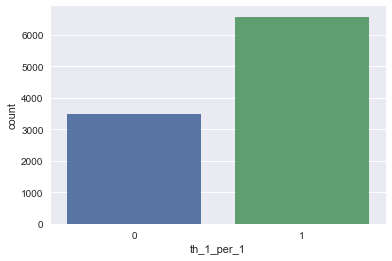

In [27]:
#sns.countplot(df['th_1_per_1'])
sns.countplot(df.th_1_per_1)


In [28]:
#pd.tools.plotting.radviz(df, 'eval_th')


In [29]:
df[11:][['arveres_id','th_1_per_1']]

,arveres_id,th_1_per_1
11,308084,0
12,308085,1
13,308087,1
14,308625,1
15,309448,1
16,309596,1
17,309658,1
18,309707,1
19,309793,1
20,310725,1


In [30]:
submission = pd.DataFrame({
        "arveres_id": df[11:]["arveres_id"],
        "th_1_per_1": df[11:]["th_1_per_1"]
    })
submission.to_csv('th_ok.csv', index=False)



# Tanulmány kódok



In [31]:
print(eval('1/2+1/2'))
print(eval('95/100+5/100==1/1'))
print(eval('94/100+5/100==1/1'))

1.0
True
False


In [32]:
print([ord('0'), ord('1')])
print(type(ord('1')))
print(isinstance(ord('1'),int))
print(isinstance('1',int))
print(type(eval('1/2+1/2')))

isinstance(eval('1/2+1/2'),float)

[48, 49]
<class 'int'>
True
False
<class 'float'>


True

In [33]:
str='012345abc -'
print(str[4].isdigit())

True


In [34]:
str='012345abc -'
str is None

False

In [35]:
#tanulmány a hátulról vagdosva haladós kiértékeléshez

a="1 / 3 + 1/ 3 = 2/3 (mi lesz ebből"
print(len(a))
a[0:len(a)-1]
[x for x in range(len(a),0,-1)]
b=a.strip(' ')
#print(a, b)
for x in range(len(b),0,-1):
    #print(b[0:x])
    try:
        #ha '1/1' string szerepel benne, akkor eleve OK-nak vesszük
        eval_th_value_01=eval(b[0:x])

        if isinstance(eval_th_value_01, (int, float)):
            #int/float az eredmény kötőjel miatt néha negatív lesz, ezért abs()
            print([b[0:x],abs(eval_th_value_01)])
            #print(abs(eval_th_value_01))
            break

        else:
            #ha a kiértékelés eredménye True/False (pl. 1/4+1/4=1/2 is kiértékelhető)
            print([b[0:x],abs(eval_th_value_01)])

            pass

    except:
        #num_eval_th=0
        print([b[0:x],"Nem OK"])
        pass

    


33
['1 / 3 + 1/ 3 = 2/3 (mi lesz ebből', 'Nem OK']
['1 / 3 + 1/ 3 = 2/3 (mi lesz ebbő', 'Nem OK']
['1 / 3 + 1/ 3 = 2/3 (mi lesz ebb', 'Nem OK']
['1 / 3 + 1/ 3 = 2/3 (mi lesz eb', 'Nem OK']
['1 / 3 + 1/ 3 = 2/3 (mi lesz e', 'Nem OK']
['1 / 3 + 1/ 3 = 2/3 (mi lesz ', 'Nem OK']
['1 / 3 + 1/ 3 = 2/3 (mi lesz', 'Nem OK']
['1 / 3 + 1/ 3 = 2/3 (mi les', 'Nem OK']
['1 / 3 + 1/ 3 = 2/3 (mi le', 'Nem OK']
['1 / 3 + 1/ 3 = 2/3 (mi l', 'Nem OK']
['1 / 3 + 1/ 3 = 2/3 (mi ', 'Nem OK']
['1 / 3 + 1/ 3 = 2/3 (mi', 'Nem OK']
['1 / 3 + 1/ 3 = 2/3 (m', 'Nem OK']
['1 / 3 + 1/ 3 = 2/3 (', 'Nem OK']
['1 / 3 + 1/ 3 = 2/3 ', 'Nem OK']
['1 / 3 + 1/ 3 = 2/3', 'Nem OK']
['1 / 3 + 1/ 3 = 2/', 'Nem OK']
['1 / 3 + 1/ 3 = 2', 'Nem OK']
['1 / 3 + 1/ 3 = ', 'Nem OK']
['1 / 3 + 1/ 3 =', 'Nem OK']
['1 / 3 + 1/ 3 ', 0.6666666666666666]


In [36]:
a="1 / 3 - 1/ 3 = 2/3 (mi lesz ebből"
list(a)
a.strip()
a.lstrip()
a.replace(' ','').replace('-',' +').replace('+',' + ').replace('=',' = ').split()
b=a.replace('-',' +').replace('+',' + ').replace('=',' = ').replace(' ','')
#a.replace(' ','').replace('-','+')
#a.replace(' -','-')
#list(a.replace(' ',''))
#len(set(a))
#b[:b.find('=')].split('+')
print(b[:b.find('=')])
b[:b.find('=')].count('/')
eval(b[:b.find('=')])

1/3+1/3


0.6666666666666666

In [37]:
a="1 / 3 + 1/ 3 = 2/3 (mi lesz ebből"
a.split(' ')

['1', '/', '3', '+', '1/', '3', '=', '2/3', '(mi', 'lesz', 'ebből']

In [38]:
from string import punctuation
print(punctuation)


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [39]:
tweet="1 / 3 + 1/ 3 = 2/3 (mi lesz ebből"
tweet_processed=tweet.lower()
for p in list(punctuation):
    tweet_processed=tweet_processed.replace(p,'')
print(tweet_processed)    

1  3  1 3  23 mi lesz ebből


In [40]:
a='1/2+1/2 (összesen: 2*+-'
print(th_replace(a))

1/2+1/2 ( 2++


In [ ]:
import urllib
'''
url='http://www.unc.edu/~ncaren/haphazard/negative.txt'
file_name='negative.txt'
urllib.urlretrieve(url,file_name)

urllib.urlretrieve('http://www.unc.edu/~ncaren/haphazard/negative.txt','negative.txt')
'''
files=['negative.txt','positive.txt','obama_tweets.txt']
path='http://www.unc.edu/~ncaren/haphazard/'
for file_name in files:
    urllib.request.urlopen(path+file_name,file_name)


In [ ]:
tweets = open("obama_tweets.txt").read()
tweets_list = tweets.split('\n')
len(tweets_list)

for tweet in tweets_list[0:5]:
    print(tweet)



# Tanulmány kódok vége



# További próbálkozások, tanulmányok

In [41]:
# sorting the data acording to highest satisfaction level
sort = df[11:].sort_values(['tetel_tulajdoni_hanyad'], ascending = False)
sort.head(20)

,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th,th_1_per_1
129,316714,adós,,NaN,0
9993,345161,TESZT,,NaN,0
9992,345156,TESZT,,NaN,0
8454,339513,999/1000,999/1000,0.999000,0
7369,336854,99000/198000,99000/198000,0.500000,0
508,321104,99/100+1/100=1/1,99/100+1/100=1/1,1.000000,1
6600,335070,99/100+1/100=1/1,99/100+1/100=1/1,1.000000,1
9702,343859,99/100,99/100,0.990000,0
9416,342811,99/100,99/100,0.990000,0
7183,336349,99/100,99/100,0.990000,0


In [42]:
# printing the employee number with the hughest average monthly hours
sort = df.sort_values(['tetel_tulajdoni_hanyad'] , ascending = True)
sort.head(100)

,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th,th_1_per_1
8437,339457,(1/1) 1/2-1/2,(1/1) 1/2+1/2,1.000000,1
5279,332743,(1/1-ed 1/2+1/2),(1/1+ 1/2+1/2),1.000000,1
7147,336123,(1/2 + 1/2) = 1/1,(1/2 + 1/2) = 1/1,1.000000,1
1643,324519,(1/2 + 1/2) = 1/1,(1/2 + 1/2) = 1/1,1.000000,1
1128,323194,(1/2+1/2) 1/1,(1/2+1/2) 1/1,1.000000,1
6221,334436,(1/2+1/2) 1/1,(1/2+1/2) 1/1,1.000000,1
4049,330272,(1/2+1/2) 1/1,(1/2+1/2) 1/1,1.000000,1
8501,339611,(1/2-1/2) 1/1,(1/2+1/2) 1/1,1.000000,1
4392,331031,(1/2-1/2)= 1/1,(1/2+1/2)= 1/1,1.000000,1
8637,340031,(1/2-1/2)= 1/1,(1/2+1/2)= 1/1,1.000000,1


In [43]:
df['th_1_per_1'].sum(axis=0)

6570

In [44]:
df.describe()
#df.count()
#pd.value_counts()


,eval_th,th_1_per_1
count,10038.000000,10044.000000
mean,0.822915,0.654122
std,1.804899,0.475677
min,0.005000,0.000000
25%,0.500000,0.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,175.305000,1.000000


In [45]:
# Method 2: To simply print out the maximum value of eval_th by simply 
# accessing the column in the dataset

[df['eval_th'].min(), df['eval_th'].max()]

[0.0050000000000000001, 175.30500000000001]

In [46]:
# To print the tetel_tulajdoni_hanyad associated with the highest eval_th
df['tetel_tulajdoni_hanyad'][df['eval_th']==df['eval_th'].max()]

7981    240/1000+65/1000+175
Name: tetel_tulajdoni_hanyad, dtype: object

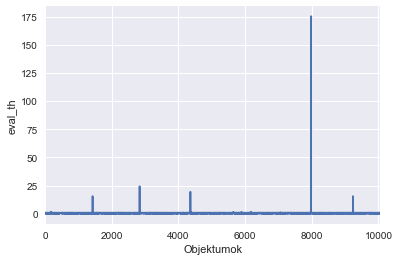

In [47]:
# Creating a graph of the eval_th
ax = df['eval_th'].plot()
#print(ax)
ax.set_xlabel('Objektumok')
ax.set_ylabel('eval_th')


In [48]:
# To print the unique values of the column sales
df['eval_th'].unique()
# To print them as a list
for x in df['eval_th'].unique():
    print(x)

0.166666666667
1.0
nan
0.5
0.25
0.142857142857
0.272727272727
0.0357142857143
0.9
0.375
0.7
0.666666666667
0.707930367505
0.2
0.0440487347704
1.83333333333
0.333333333333
0.708333333333
0.1
0.50009825113
0.047619047619
0.21
0.0833333333333
0.264445754717
0.75
0.6
0.4
1.0
0.464285714286
0.125
0.324155193992
0.0138029111594
0.0529010238908
0.4608
0.28125
0.725
0.055
0.879166666667
0.0138339920949
0.146533973919
0.444444444444
0.0555555555556
0.388888888889
0.0277777777778
0.0078125
0.324098036231
0.0625
0.18149
0.309523809524
0.833333333333
0.05
0.107142857143
0.241071428571
0.65625
0.065
0.5121
0.00892857142857
0.059009009009
0.145833333333
0.785714285714
0.858
0.875
0.437665782493
0.0487711680417
0.101067887109
0.7433
0.325
0.0909090909091
0.0714285714286
0.00833333333333
0.039
0.716666666667
0.283333333333
15.7115384615
0.249
0.916666666667
0.416666666667
0.0729166666667
0.0333333333333
0.48623853211
0.0370096225019
0.3125
0.005
0.0809
0.633333333333
0.448412698413
0.539393939394
0.37

In [49]:
df.sort_values(['eval_th'] , ascending = True)

,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th,th_1_per_1
6664,335206,1/200,1/200,0.005000,0
1558,324293,1/200,1/200,0.005000,0
3417,328834,22/3067,22/3067,0.007173,0
853,322550,3/384,3/384,0.007812,0
1313,323646,1/120,1/120,0.008333,0
8184,338634,1/120,1/120,0.008333,0
1094,323119,18/2016,18/2016,0.008929,0
9484,343081,1/100,1/100,0.010000,0
9417,342812,1/100,1/100,0.010000,0
5957,333963,2/192,2/192,0.010417,0


In [50]:
# adding a new column to the dataset
df['NewCol'] = 5
df.head()

,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th,th_1_per_1,NewCol
0,308084,1/6,1/6,0.166667,0,5
1,308085,1/1,1/1,1.000000,1,5
2,308087,2/2,2/2,1.000000,1,5
3,308625,1/2+1/2 (összesen: 2,1/2+1/2 ( 2,1.000000,1,5
4,309448,1/1,1/1,1.000000,1,5


In [51]:
# Modifying the value of our new column 
df['NewCol'] = df['NewCol'] * 2
df.head()

,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th,th_1_per_1,NewCol
0,308084,1/6,1/6,0.166667,0,10
1,308085,1/1,1/1,1.000000,1,10
2,308087,2/2,2/2,1.000000,1,10
3,308625,1/2+1/2 (összesen: 2,1/2+1/2 ( 2,1.000000,1,10
4,309448,1/1,1/1,1.000000,1,10


In [52]:
# Deleting the new column
del df['NewCol']
df.head()

,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th,th_1_per_1
0,308084,1/6,1/6,0.166667,0
1,308085,1/1,1/1,1.000000,1
2,308087,2/2,2/2,1.000000,1
3,308625,1/2+1/2 (összesen: 2,1/2+1/2 ( 2,1.000000,1
4,309448,1/1,1/1,1.000000,1


In [53]:
df

,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th,th_1_per_1
0,308084,1/6,1/6,0.166667,0
1,308085,1/1,1/1,1.000000,1
2,308087,2/2,2/2,1.000000,1
3,308625,1/2+1/2 (összesen: 2,1/2+1/2 ( 2,1.000000,1
4,309448,1/1,1/1,1.000000,1
5,309596,1/1,1/1,1.000000,1
6,309658,1/1,1/1,1.000000,1
7,309707,1/1,1/1,1.000000,1
8,309793,1/1,1/1,1.000000,1
9,310725,1/1,1/1,1.000000,1


In [54]:
# The "loc" function is used to select pieces of the dataframe.
df.loc[0:20]

,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th,th_1_per_1
0,308084,1/6,1/6,0.166667,0
1,308085,1/1,1/1,1.000000,1
2,308087,2/2,2/2,1.000000,1
3,308625,1/2+1/2 (összesen: 2,1/2+1/2 ( 2,1.000000,1
4,309448,1/1,1/1,1.000000,1
5,309596,1/1,1/1,1.000000,1
6,309658,1/1,1/1,1.000000,1
7,309707,1/1,1/1,1.000000,1
8,309793,1/1,1/1,1.000000,1
9,310725,1/1,1/1,1.000000,1


In [55]:
df.loc[21:40]

,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th,th_1_per_1
21,310726,1/1,1/1,1.0,1
22,310917,1/1,1/1,1.0,1
23,310955,1/1,1/1,1.0,1
24,311132,1/2,1/2,0.5,0
25,311133,1/2,1/2,0.5,0
26,311137,1/1,1/1,1.0,1
27,311323,1/2+1/2=1/1,1/2+1/2=1/1,1.0,1
28,311324,1/2+1/2=1/1,1/2+1/2=1/1,1.0,1
29,311325,1/2+1/2=1/1,1/2+1/2=1/1,1.0,1
30,311576,1/1,1/1,1.0,1


In [56]:
# Slicing a part of the dataframe of one column---Location based indexing 
df.ix[0:5,'eval_th']

0    0.166667
1    1.000000
2    1.000000
3    1.000000
4    1.000000
5    1.000000
Name: eval_th, dtype: float64

In [57]:
# To select bottom records
df.tail()

,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th,th_1_per_1
10039,345680,1/8,1/8,0.125,0
10040,345711,1/1,1/1,1.000,1
10041,345719,1/1,1/1,1.000,1
10042,345762,1/2 + 1/2,1/2 + 1/2,1.000,1
10043,345764,1/1,1/1,1.000,1


In [58]:
# Testing the function value counts
df['eval_th'].value_counts()

1.000000      6570
0.500000      1981
0.250000       392
0.166667       149
0.333333       127
0.125000        94
0.750000        44
0.083333        44
0.666667        32
0.200000        30
0.100000        29
0.375000        16
0.142857        14
0.900000        12
1.000000        12
0.400000        11
0.050000        10
0.062500         9
0.600000         9
0.071429         8
0.875000         7
0.416667         7
0.800000         7
0.833333         7
0.300000         7
0.700000         6
0.158333         6
0.625000         6
0.150000         5
0.055556         5
              ... 
0.159722         1
175.305000       1
0.184211         1
0.637500         1
0.281421         1
0.916667         1
0.422222         1
0.541667         1
0.072183         1
0.285714         1
0.819672         1
0.047000         1
0.027550         1
0.214286         1
1.441877         1
0.493066         1
0.314815         1
0.642857         1
0.708333         1
0.012000         1
0.117284         1
0.281233    

In [59]:
df['tetel_tulajdoni_hanyad'].value_counts()

1/1                     4883
1/2                     1574
1/2+1/2                  307
1/4                      301
1/2+1/2=1/1              277
2/4                      132
1/6                      114
2/2                      108
1/2 + 1/2                 90
1/3                       69
1/1 (1/2+1/2)             67
1/8                       63
1/2 + 1/2 = 1/1           56
1/2-1/2                   53
1/1 (1/2-1/2)             46
1/2.                      42
1/1.                      38
2/6                       32
1/1-ed                    32
3/6                       30
1/12                      30
2/8                       29
4/8                       28
1/2 + 1/2 = 2/2           28
1/2+1/2=2/2               25
1/10                      23
3/4                       22
4/4                       21
1/2+1/2 mindösszesen      19
1/5                       18
                        ... 
6/30                       1
15/27  (1/1)               1
1/2 (osztatlan közös       1
5/9           

In [60]:
df['th_cleared'].value_counts()

1/1                     4921
1/2                     1616
1/2+1/2                  380
1/4                      303
1/2+1/2=1/1              286
2/4                      134
1/6                      114
1/1 (1/2+1/2)            113
2/2                      109
1/2 + 1/2                104
1/3                       71
1/8                       64
1/2 + 1/2 = 1/1           59
1/1+                      32
2/6                       32
1/12                      31
2/8                       30
3/6                       30
1/2 + 1/2 = 2/2           28
4/8                       28
1/2+1/2=2/2               25
1/10                      23
3/4                       22
4/4                       21
1/5                       18
1/2+1/2 (1/1)             15
1/1(1/2+1/2)              15
1/2+                      15
3/12                      15
6/12                      15
                        ... 
2376/8500                  1
8749/192000 (1/2)          1
2/6+1/6                    1
30/360        

In [61]:
# Testing the function value counts
df['th_1_per_1'].value_counts()

1    6570
0    3474
Name: th_1_per_1, dtype: int64

In [62]:
 #column names to a list
df.columns.tolist()

['arveres_id', 'tetel_tulajdoni_hanyad', 'th_cleared', 'eval_th', 'th_1_per_1']